[Back](https://keqideng.github.io/data_analysis_portfolio_project/)
# Ontario Covid-19 Data Analysis
Date Sept 14 2021

Prepared by ***Keqi Deng***

Data Source: [Ontario Open Data](https://data.ontario.ca/en/dataset)

## Note
This analysis used public data provided by Ontario Public Health. The main purpose of this analysis is to find the correlation between different attributes. Analysis methods are not from academical research. The author of this report does not have background in epidemiology. This study is solely for data analysis demonstration purpose only.

## Analysis Goals
* Identify COVID-19 daily new case trend in districts with most COVID-19 cases
* Calculate the change percentage rate for daily COVID-19 cases
* Identify the districts with higher than average increasing rate
* Visualize the vaccination rate of different public health district
* Plot scatter plot to see if there's any correlation between recent daily case increasing rate and the vaccination rate
* Visualize the infection rate per 100k people in different age groups, comparing the vaccine effectiveness

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import io
from _datetime import datetime
import wordcloud

## Import Data
In order to import the online csv datasets from public data, use the following instant function to simplify the process:

In [2]:
def df_csv(url):
    source = requests.get(url).text
    reader = io.StringIO(source)
    return pd.read_csv(reader)

Then, import [Status of COVID-19 cases in Ontario](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11) and [Daily change in cases by PHU](https://data.ontario.ca/en/dataset/status-of-covid-19-cases-in-ontario/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f) datasets from Ontario Government website:

In [3]:
on_covid_status_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv')
on_covid_status_df['Reported Date'] = pd.to_datetime(on_covid_status_df['Reported Date'])

print(on_covid_status_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 29 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Reported Date                                              588 non-null    datetime64[ns]
 1   Confirmed Negative                                         47 non-null     float64       
 2   Presumptive Negative                                       12 non-null     float64       
 3   Presumptive Positive                                       25 non-null     float64       
 4   Confirmed Positive                                         586 non-null    float64       
 5   Resolved                                                   576 non-null    float64       
 6   Deaths                                                     548 non-null    float64       
 7   Total Cases                        

In [4]:
phu_daily_df = df_csv('https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/8a88fe6d-d8fb-41a3-9d04-f0550a44999f/download/daily_change_in_cases_by_phu.csv')
phu_daily_df['Date'] = pd.to_datetime(phu_daily_df['Date'])

print(phu_daily_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            541 non-null    datetime64[ns]
 1   Algoma_District                 538 non-null    float64       
 2   Brant_County                    538 non-null    float64       
 3   Chatham_Kent                    538 non-null    float64       
 4   Durham_Region                   538 non-null    float64       
 5   Eastern_Ontario                 538 non-null    float64       
 6   Grey_Bruce                      538 non-null    float64       
 7   Haldimand_Norfolk               538 non-null    float64       
 8   Haliburton_Kawartha_Pine_Ridge  538 non-null    float64       
 9   Halton_Region                   538 non-null    float64       
 10  City_of_Hamilton                538 non-null    float64       
 11  Hastin

## Daily New Case Analysis
Calculate the rolling average of the different health regions:


In [5]:
phu_daily_avg_df = phu_daily_df.rolling(window = 7).mean()
phu_daily_avg_df.drop('Total', axis = 1, inplace = True)
phu_daily_avg_df['Date'] = phu_daily_df.Date
phu_daily_avg_df.dropna(how='any', inplace=True)
print(phu_daily_avg_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 12 to 540
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Algoma_District                 529 non-null    float64       
 1   Brant_County                    529 non-null    float64       
 2   Chatham_Kent                    529 non-null    float64       
 3   Durham_Region                   529 non-null    float64       
 4   Eastern_Ontario                 529 non-null    float64       
 5   Grey_Bruce                      529 non-null    float64       
 6   Haldimand_Norfolk               529 non-null    float64       
 7   Haliburton_Kawartha_Pine_Ridge  529 non-null    float64       
 8   Halton_Region                   529 non-null    float64       
 9   City_of_Hamilton                529 non-null    float64       
 10  Hastings_Prince_Edward          529 non-null    float64       
 11  Huron

Plot the result

<AxesSubplot:>

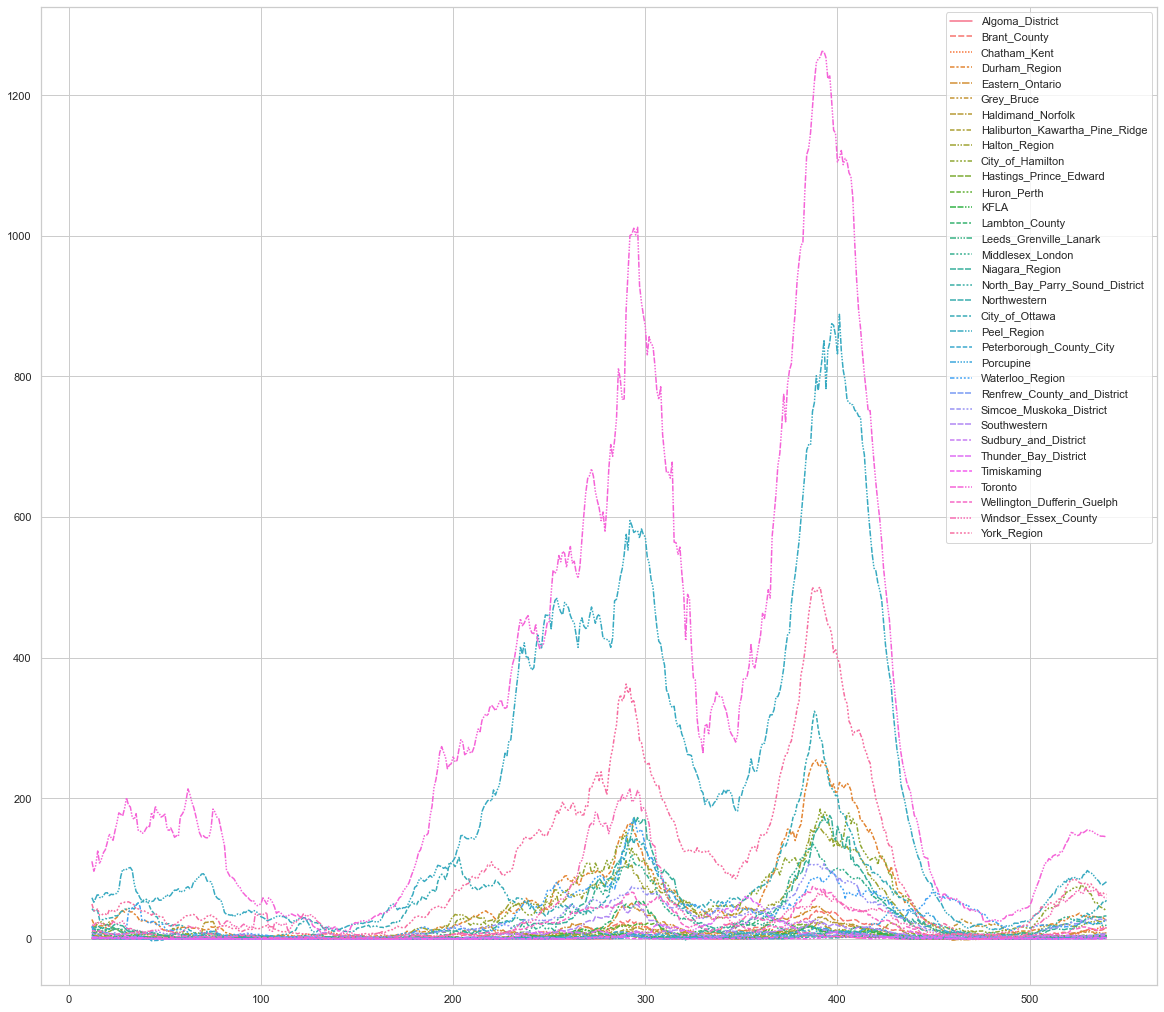

In [6]:
plt.figure(figsize=(20,18))
sns.set_theme(style="whitegrid", palette="colorblind")
sns.lineplot(data = phu_daily_avg_df)

We realize that it is hard to show the trend for specific regions.

In order to do that, we would like to focus on top 4 regions with top average daily cases:

In [7]:
phu_daily_df.mean().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_77036/3503816743.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  phu_daily_df.mean().sort_values(ascending=False)


Total                             1064.792976
Toronto                            318.855019
Peel_Region                        210.332714
York_Region                        103.256506
City_of_Ottawa                      53.856877
Durham_Region                       49.330855
City_of_Hamilton                    44.286245
Waterloo_Region                     35.823420
Windsor_Essex_County                35.548327
Halton_Region                       34.302974
Niagara_Region                      31.914498
Middlesex_London                    25.375465
Simcoe_Muskoka_District             24.754647
Wellington_Dufferin_Guelph          16.362454
Eastern_Ontario                      9.070632
Brant_County                         7.975836
Southwestern                         7.756506
Lambton_County                       6.927509
Thunder_Bay_District                 6.299257
Haldimand_Norfolk                    5.262082
Haliburton_Kawartha_Pine_Ridge       4.410781
Sudbury_and_District              

The regions with top 4 daily COVID-19 cases are Toronto, Peel, York and Ottawa.

First we stack the data from different regions for graphing:

In [8]:
phu_top_four_df = phu_daily_avg_df[['Date','Toronto','Peel_Region','York_Region','City_of_Ottawa']]
phu_top_four_df.set_index('Date', inplace=True)
phu_top_four_stack_df = pd.DataFrame(phu_top_four_df.stack().reset_index())
phu_top_four_stack_df.rename(columns={'level_1':'PHU',0:'7day_avg_infc'}, inplace=True)
print(phu_top_four_stack_df.head(5))

        Date             PHU  7day_avg_infc
0 2020-04-05         Toronto     110.428571
1 2020-04-05     Peel_Region      58.571429
2 2020-04-05     York_Region      49.714286
3 2020-04-05  City_of_Ottawa      43.000000
4 2020-04-06         Toronto      96.285714


Then use ```Seaborn``` for graphing:


<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

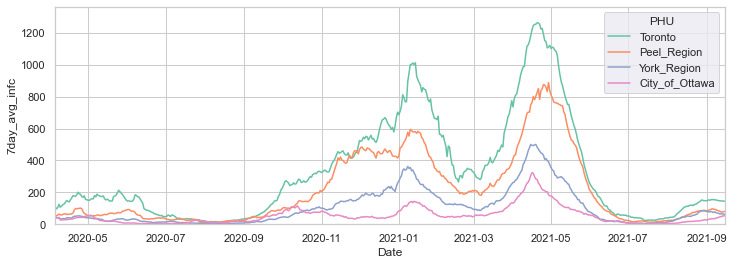

In [9]:
fig = plt.figure(figsize=(12,4))
plt.xlim(phu_top_four_stack_df.Date.min(),phu_top_four_stack_df.Date.max())
plt.ylim(0,phu_top_four_stack_df['7day_avg_infc'].max()+100)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

Separate to 4 small plots:

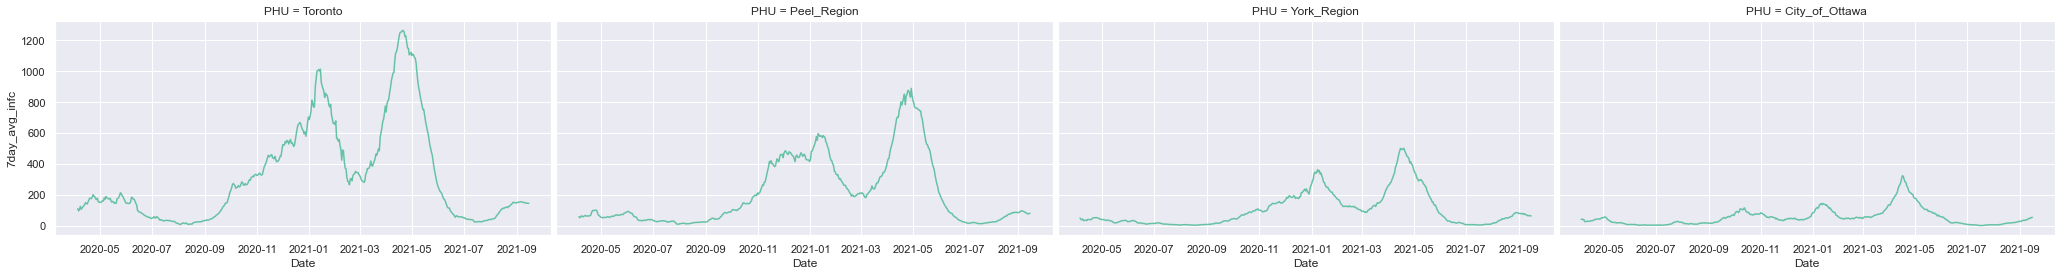

In [10]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_top_four_stack_df, col='PHU', margin_titles=True, despine=False, height=4, aspect=1.8)
fig.map(sns.lineplot, 'Date', '7day_avg_infc')
fig.figure.subplots_adjust(wspace=0.01)

Calculate the daily change rate of four different health regions:

In [11]:
phu_top_four_pct_df = phu_top_four_df.pct_change().dropna()
phu_four_reg_pct_stack = pd.DataFrame(phu_top_four_pct_df.stack()).reset_index()
phu_four_reg_pct_stack.rename(columns={'level_1':'PHU',0:'avg_inf'}, inplace=True)
print(phu_four_reg_pct_stack.head(5))

        Date             PHU   avg_inf
0 2020-04-06         Toronto -0.128072
1 2020-04-06     Peel_Region -0.109756
2 2020-04-06     York_Region -0.186782
3 2020-04-06  City_of_Ottawa -0.076412
4 2020-04-07         Toronto  0.089021


Use the same method to plot in order to compare trend:

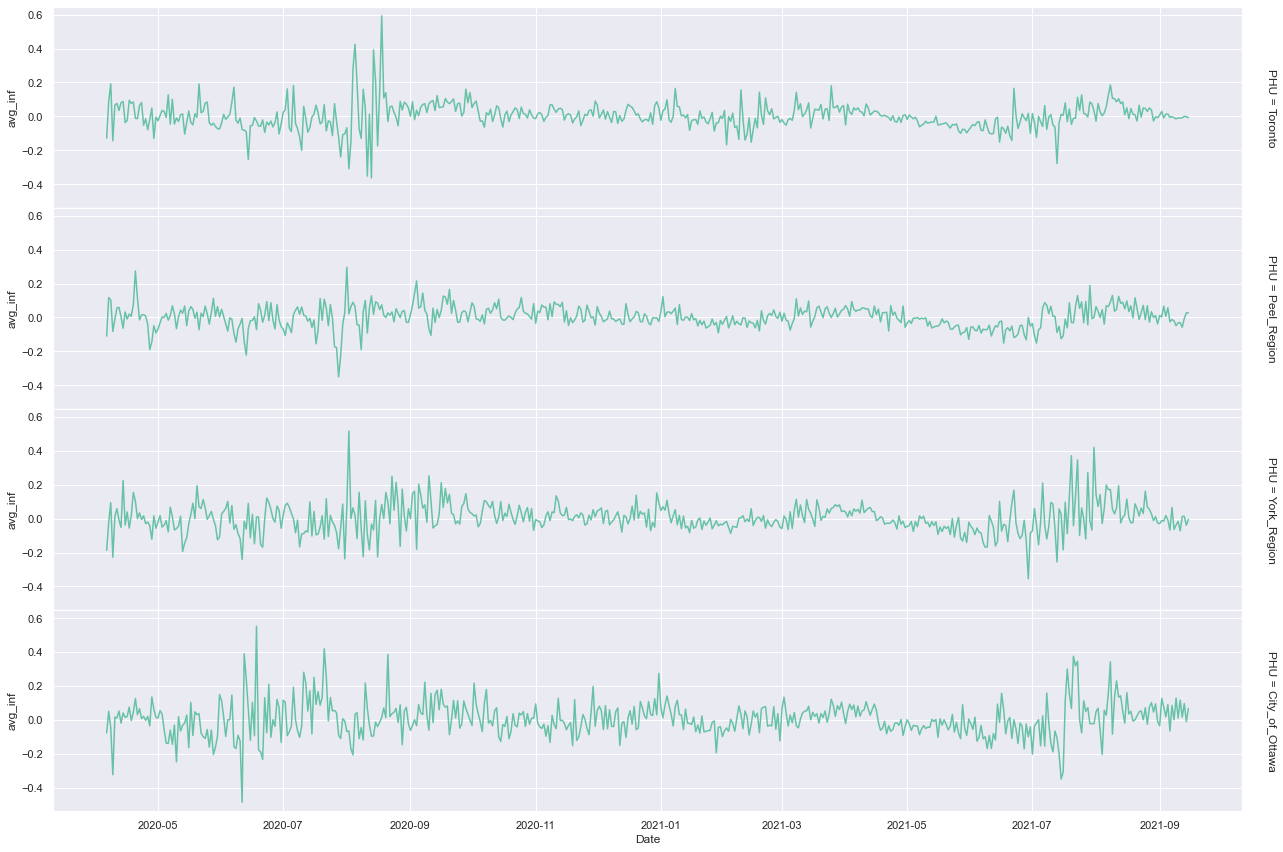

In [12]:
sns.set_theme(style='darkgrid', palette='Set2')
fig = sns.FacetGrid(data=phu_four_reg_pct_stack, row='PHU', margin_titles=True, despine=False, height=3, aspect=6)
fig.map(sns.lineplot, 'Date', 'avg_inf')
fig.figure.subplots_adjust(hspace=0)

For the past 30 days:

<AxesSubplot:xlabel='Date', ylabel='avg_inf'>

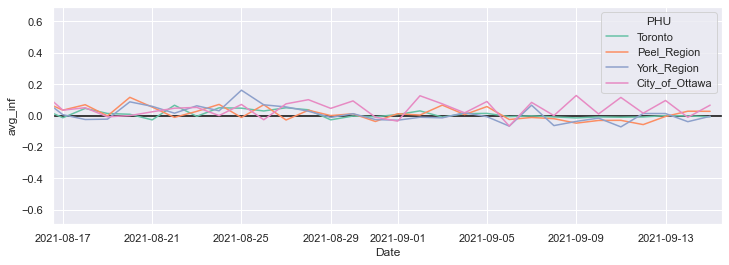

In [13]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(-phu_four_reg_pct_stack.avg_inf.max()-0.1,phu_four_reg_pct_stack.avg_inf.max()+0.1)
sns.set_theme(style='darkgrid', palette='Set2')
plt.axhline(y=0, color='black')
sns.lineplot(data=phu_four_reg_pct_stack, x = 'Date', y = 'avg_inf', hue='PHU')

<AxesSubplot:xlabel='Date', ylabel='7day_avg_infc'>

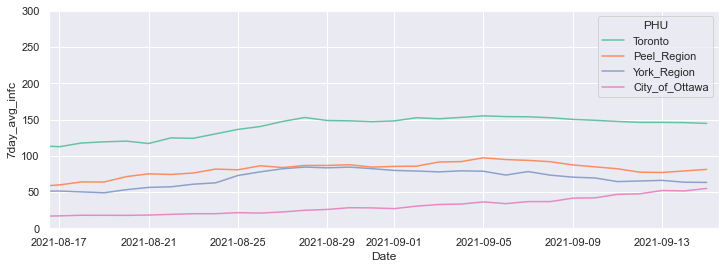

In [14]:
fig = plt.figure(figsize=(12,4))
plt.xlim(np.datetime64(datetime.today()) - np.timedelta64(30, 'D'),np.datetime64(datetime.today()))
plt.ylim(0,300)
sns.set_theme(style='darkgrid', palette='Set2')
sns.lineplot(data=phu_top_four_stack_df, x = 'Date', y = '7day_avg_infc', hue='PHU')

We can see that as the infection cases go up in Ontario, the daily new infected patient in Toronto, Peel and York Region are not significantly increased at lease for the past two weeks. Use the following methods to find out which region have the highest increase rate:

In [15]:
phu_pct_df = phu_daily_df.iloc[:,1:].pct_change()
phu_pct_df['Date'] = phu_daily_df.Date

#Calculate the region with highest increasing rate for the past week:
phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_77036/1285918203.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_pct_df[phu_pct_df.Date > np.datetime64(datetime.today()) - np.timedelta64(7, 'D')].sum().sort_values(ascending=False)


Algoma_District                        inf
Middlesex_London                       inf
Thunder_Bay_District                   inf
Grey_Bruce                             inf
Haldimand_Norfolk                      inf
Renfrew_County_and_District            inf
Northwestern                           inf
Porcupine                              inf
Lambton_County                         inf
Eastern_Ontario                   8.530357
Huron_Perth                       8.042857
Hastings_Prince_Edward            7.375000
Haliburton_Kawartha_Pine_Ridge    3.857143
Sudbury_and_District              3.834524
Brant_County                      3.176440
Leeds_Grenville_Lanark            2.921429
City_of_Ottawa                    2.424614
City_of_Hamilton                  1.811937
North_Bay_Parry_Sound_District    1.138095
Peterborough_County_City          1.000000
Durham_Region                     0.772641
Peel_Region                       0.676195
Wellington_Dufferin_Guelph        0.559915
Halton_Regi

In order to make sense of the infinite value, make a pseudo dataset where we replace 0 to 0.1, then rank the infection case increasing rate for the past week:

In [16]:
pseudo_phu_df = phu_daily_df.replace(0,0.8)

#Percentage Change:
pseudo_phu_pct_df = pseudo_phu_df.iloc[:,1:].pct_change()
pseudo_phu_pct_df['Date'] = pseudo_phu_df.Date

#Region increasing rate ranking for the past 7 days:
phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)
phu_change_rate

/var/folders/df/l_7_3v3s13b0w6_jwtd7kkrh0000gn/T/ipykernel_77036/3641534642.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  phu_change_rate = pseudo_phu_pct_df[pseudo_phu_pct_df.Date > np.datetime64(datetime.today())-np.timedelta64(7,'D')].sum().sort_values(ascending=False)


Middlesex_London                  21.652790
Lambton_County                     8.616667
Eastern_Ontario                    8.530357
Huron_Perth                        8.042857
Haldimand_Norfolk                  7.722222
Algoma_District                    7.425000
Hastings_Prince_Edward             7.375000
Grey_Bruce                         7.064286
Renfrew_County_and_District        6.680952
Northwestern                       6.450000
Haliburton_Kawartha_Pine_Ridge     3.857143
Sudbury_and_District               3.834524
Brant_County                       3.176440
Leeds_Grenville_Lanark             2.921429
Porcupine                          2.450000
City_of_Ottawa                     2.424614
City_of_Hamilton                   1.811937
Thunder_Bay_District               1.600000
North_Bay_Parry_Sound_District     1.338095
Peterborough_County_City           1.000000
Durham_Region                      0.772641
Peel_Region                        0.676195
Wellington_Dufferin_Guelph      

Using ```wordcloud``` to  see which public health district has the highest COVID-19 daily new case increasing rate:

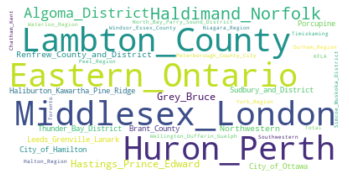

In [17]:
phu_change_rate_df = pd.DataFrame(phu_change_rate)
phu_change_rate_df.columns = ['change_rate']

text = ' '.join(phu for phu in phu_change_rate_df.index)
wc = wordcloud.WordCloud(background_color='white').generate(text=text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
'''
Here we can get a list of health regions
that with daily case count increasing rate
higher than provincial average:
'''
abov_avg_phu = phu_change_rate[phu_change_rate.values>phu_change_rate['Total']]
phu_list = np.array(abov_avg_phu.index)
phu_list


array(['Middlesex_London', 'Lambton_County', 'Eastern_Ontario',
       'Huron_Perth', 'Haldimand_Norfolk', 'Algoma_District',
       'Hastings_Prince_Edward', 'Grey_Bruce',
       'Renfrew_County_and_District', 'Northwestern',
       'Haliburton_Kawartha_Pine_Ridge', 'Sudbury_and_District',
       'Brant_County', 'Leeds_Grenville_Lanark', 'Porcupine',
       'City_of_Ottawa', 'City_of_Hamilton', 'Thunder_Bay_District',
       'North_Bay_Parry_Sound_District', 'Peterborough_County_City',
       'Durham_Region', 'Peel_Region', 'Wellington_Dufferin_Guelph',
       'Halton_Region', 'Waterloo_Region', 'Niagara_Region',
       'Windsor_Essex_County', 'York_Region', 'KFLA'], dtype=object)

## Vaccination Data Analysis
Data from Ontario OpenData [COVID-19 Vaccine data by Public Health Unit](https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/2a362139-b782-43b1-b3cb-078a2ef19524), updated daily.

In [19]:
#Data from Ontario OpenData, updated daily
on_vaxx_df = df_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/2a362139-b782-43b1-b3cb-078a2ef19524/download/vaccines_by_age_phu.csv')
on_vaxx_df['Date'] = pd.to_datetime(on_vaxx_df.Date)
on_vaxx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20009 entries, 0 to 20008
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          20009 non-null  datetime64[ns]
 1   PHU ID                        20009 non-null  int64         
 2   PHU name                      20009 non-null  object        
 3   Agegroup                      20009 non-null  object        
 4   At least one dose_cumulative  20009 non-null  int64         
 5   Second_dose_cumulative        19682 non-null  float64       
 6   Total population              20009 non-null  int64         
 7   Percent_at_least_one_dose     17680 non-null  float64       
 8   Percent_fully_vaccinated      17680 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 1.4+ MB


In [20]:
on_vaxx_df.Date

0       2021-07-26
1       2021-07-26
2       2021-07-26
3       2021-07-26
4       2021-07-26
           ...    
20004   2021-09-15
20005   2021-09-15
20006   2021-09-15
20007   2021-09-15
20008   2021-09-15
Name: Date, Length: 20009, dtype: datetime64[ns]

In [21]:
#Find the most recent data:

on_vaxx_rn_df = on_vaxx_df[on_vaxx_df.Date == np.datetime64(datetime.today().date())]
on_vaxx_rn_df

,Date,PHU ID,PHU name,Agegroup,At least one dose_cumulative,Second_dose_cumulative,Total population,Percent_at_least_one_dose,Percent_fully_vaccinated
19624,2021-09-15,2226,ALGOMA DISTRICT,12-17yrs,4795,3973.0,6504,0.7372,0.6109
19625,2021-09-15,2227,BRANT COUNTY,12-17yrs,7517,6388.0,10734,0.7003,0.5951
19626,2021-09-15,2240,CHATHAM-KENT,12-17yrs,4296,3427.0,7233,0.5939,0.4738
19627,2021-09-15,2237,CITY OF HAMILTON,12-17yrs,27661,22441.0,37018,0.7472,0.6062
19628,2021-09-15,2251,CITY OF OTTAWA,12-17yrs,60081,51589.0,66222,0.9073,0.7790
...,...,...,...,...,...,...,...,...,...
20004,2021-09-15,9999,UNKNOWN,Undisclosed_or_missing,32,15.0,0,NaN,NaN
20005,2021-09-15,2265,WATERLOO REGION,Undisclosed_or_missing,26,4.0,0,NaN,NaN
20006,2021-09-15,2266,WELLINGTON-DUFFERIN-GUELPH,Undisclosed_or_missing,13,2.0,0,NaN,NaN
20007,2021-09-15,2268,WINDSOR-ESSEX COUNTY,Undisclosed_or_missing,20,5.0,0,NaN,NaN


In [22]:
pd.value_counts(on_vaxx_rn_df['Agegroup'])

12-17yrs                  35
18-29yrs                  35
30-39yrs                  35
40-49yrs                  35
50-59yrs                  35
60-69yrs                  35
70-79yrs                  35
80+                       35
Adults_18plus             35
Ontario_12plus            35
Undisclosed_or_missing    35
Name: Agegroup, dtype: int64

In [23]:
#First we ignore the age group difference, focus on the district
on_vaxx_rn_df = on_vaxx_rn_df[on_vaxx_rn_df.Agegroup == 'Ontario_12plus']
on_vaxx_piv = pd.pivot_table(data=on_vaxx_rn_df, values=['At least one dose_cumulative','Second_dose_cumulative','Total population'], index=['PHU ID','PHU name'], aggfunc=np.sum)
on_vaxx_piv

,,At least one dose_cumulative,Second_dose_cumulative,Total population
PHU ID,PHU name,,,
2226,ALGOMA DISTRICT,87133,80377.0,101417
2227,BRANT COUNTY,110755,102390.0,134281
2230,DURHAM REGION,532993,500637.0,617305
2233,GREY BRUCE,123505,115903.0,149060
2234,HALDIMAND-NORFOLK,81499,75259.0,100272
2235,"HALIBURTON, KAWARTHA, PINE RIDGE",145711,135162.0,170498
2236,HALTON REGION,467067,441732.0,533442
2237,CITY OF HAMILTON,423297,386604.0,519560
2238,HASTINGS & PRINCE EDWARD COUNTIES,123901,113157.0,149606


In [24]:
#Calculate the percentage
on_vaxx_piv['one_dose_pect'] = on_vaxx_piv['At least one dose_cumulative']/on_vaxx_piv['Total population']
on_vaxx_piv['full_vaxx_pect'] = on_vaxx_piv['Second_dose_cumulative']/on_vaxx_piv['Total population']
on_vaxx_piv.sort_values(by='full_vaxx_pect', ascending=False, inplace=True)
on_vaxx_piv.reset_index(inplace=True)
on_vaxx_piv

,PHU ID,PHU name,At least one dose_cumulative,Second_dose_cumulative,Total population,one_dose_pect,full_vaxx_pect
0,9999,UNKNOWN,8629,3163.0,0,inf,inf
1,2243,"LEEDS, GRENVILLE AND LANARK DISTRICT",144378,135717.0,154361,0.935327,0.879218
2,2236,HALTON REGION,467067,441732.0,533442,0.875572,0.828079
3,2262,THUNDER BAY DISTRICT,117884,108511.0,131784,0.894524,0.823400
4,2265,WATERLOO REGION,446323,414421.0,506304,0.881532,0.818522
5,2251,CITY OF OTTAWA,810492,754118.0,922751,0.878343,0.817250
6,5183,HURON PERTH,105502,98441.0,120844,0.873043,0.814612
7,2230,DURHAM REGION,532993,500637.0,617305,0.863419,0.811004
8,2266,WELLINGTON-DUFFERIN-GUELPH,232481,217769.0,270024,0.860964,0.806480
9,2244,MIDDLESEX-LONDON,386072,355532.0,444194,0.869152,0.800398


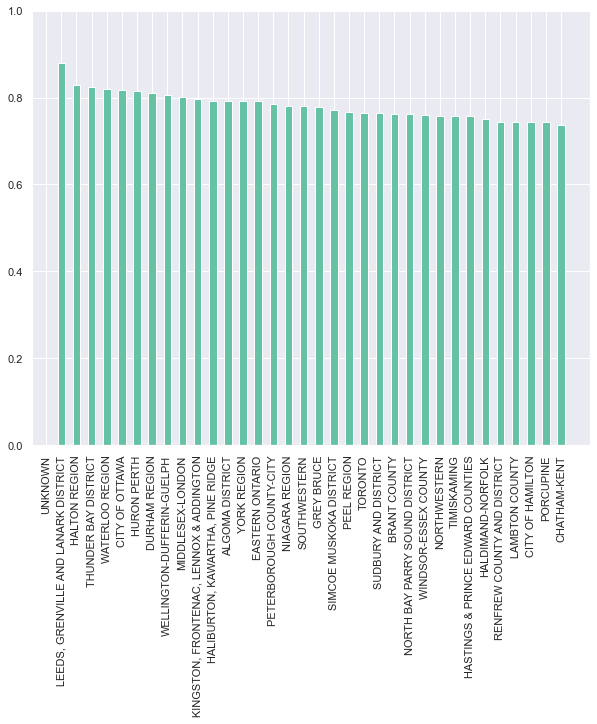

In [25]:
plt.figure(figsize=(10,8))
plt.bar(data=on_vaxx_piv,x='PHU name',height='full_vaxx_pect', width=0.5)
plt.ylim(0,1)
#put x label vertical for easier visual
plt.xticks(ticks=range(len(on_vaxx_piv)), labels=on_vaxx_piv['PHU name'], rotation=90)
plt.show()

## Correlation of Vaccination Rate and Daily Case Percentage Change

In [26]:
'''
Find Correlation between
vaccination rate and
covid case increasing rate:
'''

#prepare data for plotting
on_vaxx_piv.drop(labels=0, inplace=True)

In [27]:
on_vaxx_piv.sort_values(by='PHU name', inplace=True)
on_vaxx_piv.reset_index(inplace=True)
len(on_vaxx_piv)

34

In [28]:
phu_sum = phu_daily_df.set_index('Date')
phu_sum.fillna(0,inplace=True)
phu_sum = phu_sum.cumsum()
phu_sum=phu_sum.pct_change().dropna()
#consider the average of previous 2 weeks
phu_sum=phu_sum[phu_sum.index>(np.datetime64(datetime.today().date())-np.timedelta64(14,'D'))]
phu_mean=pd.DataFrame(phu_sum.mean())
phu_mean.reset_index(inplace=True)
phu_mean.drop(labels=34, inplace=True)
phu_mean.columns=['phu','rate']
phu_mean.sort_values(by='phu', inplace=True)
phu_mean.reset_index(inplace=True)
len(phu_mean)

34

In [29]:
#join two tables
phu_vax_n_chg = phu_mean.copy()
phu_vax_n_chg['PHU name'] = on_vaxx_piv['PHU name']
phu_vax_n_chg['one_dose_pct'] = on_vaxx_piv['one_dose_pect']
phu_vax_n_chg['full_vax_pct'] = on_vaxx_piv['full_vaxx_pect']
phu_vax_n_chg

,index,phu,rate,PHU name,one_dose_pct,full_vax_pct
0,0,Algoma_District,0.002772,ALGOMA DISTRICT,0.859156,0.792540
1,1,Brant_County,0.003365,BRANT COUNTY,0.824800,0.762505
2,2,Chatham_Kent,0.006835,CHATHAM-KENT,0.803214,0.735677
3,9,City_of_Hamilton,0.002142,CITY OF HAMILTON,0.814722,0.744099
4,19,City_of_Ottawa,0.001604,CITY OF OTTAWA,0.878343,0.817250
5,3,Durham_Region,0.001118,DURHAM REGION,0.863419,0.811004
6,4,Eastern_Ontario,0.001947,EASTERN ONTARIO,0.859131,0.792192
7,5,Grey_Bruce,0.001100,GREY BRUCE,0.828559,0.777559
8,6,Haldimand_Norfolk,0.001069,HALDIMAND-NORFOLK,0.812779,0.750549
9,7,Haliburton_Kawartha_Pine_Ridge,0.001584,"HALIBURTON, KAWARTHA, PINE RIDGE",0.854620,0.792748


<AxesSubplot:xlabel='rate', ylabel='full_vax_pct'>

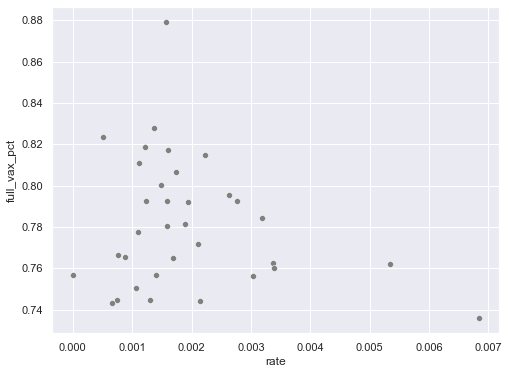

In [30]:
'''
plot seaborn.scatterplot between vaccination rate
and recent daily positive case change rate
'''

plt.figure(figsize=(8,6))
sns.scatterplot(data=phu_vax_n_chg, x='rate', y='full_vax_pct', markers='*', color='grey')

<Figure size 576x432 with 0 Axes>

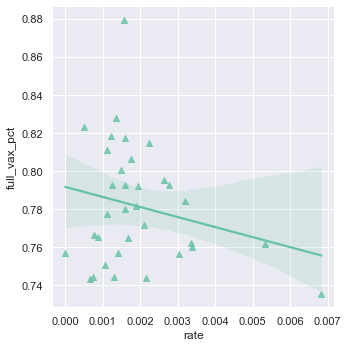

In [31]:
plt.figure(figsize=(8,6))
sns.lmplot(data=phu_vax_n_chg, x='rate', y='full_vax_pct',markers='^')

## Case Rate by Vaccination Status
Data source credit to [Ontario Government Open Data](https://data.ontario.ca/dataset/covid-19-vaccine-data-in-ontario/resource/c08620e0-a055-4d35-8cec-875a459642c3)

In [32]:
on_rate_by_vax = df_csv('https://data.ontario.ca/dataset/752ce2b7-c15a-4965-a3dc-397bf405e7cc/resource/c08620e0-a055-4d35-8cec-875a459642c3/download/cases_by_age_vac_status.csv')
#Use the most up to date data
on_rate_by_vax['date'] = pd.to_datetime(on_rate_by_vax.date)
on_rate_by_vax = on_rate_by_vax[on_rate_by_vax.date == np.datetime64(datetime.now().date())]
on_rate_by_vax

,date,agegroup,cases_unvac_rate_per100K,cases_partial_vac_rate_per100K,cases_full_vac_rate_per100K
14,2021-09-15,0-11yrs,4.75,0.00,0.00
15,2021-09-15,12-17yrs,12.90,1.00,0.47
16,2021-09-15,18-39yrs,13.39,7.50,2.25
17,2021-09-15,40-59yrs,9.65,4.28,1.60
18,2021-09-15,60-79yrs,11.01,2.38,0.65
19,2021-09-15,80+,5.56,0.00,1.45
20,2021-09-15,ALL,8.65,5.11,1.46


In [33]:
on_rate_by_vax.set_index('agegroup',inplace=True)

In [34]:
on_rate_by_vax.drop(columns=['date'],inplace=True)
on_rate_by_vax

,cases_unvac_rate_per100K,cases_partial_vac_rate_per100K,cases_full_vac_rate_per100K
agegroup,,,
0-11yrs,4.75,0.00,0.00
12-17yrs,12.90,1.00,0.47
18-39yrs,13.39,7.50,2.25
40-59yrs,9.65,4.28,1.60
60-79yrs,11.01,2.38,0.65
80+,5.56,0.00,1.45
ALL,8.65,5.11,1.46


In [35]:
#Stack the data for ploting
rate_by_vax_stkdf = pd.DataFrame(on_rate_by_vax.stack())
rate_by_vax_stkdf.reset_index(inplace=True)
rate_by_vax_stkdf

,agegroup,level_1,0
0,0-11yrs,cases_unvac_rate_per100K,4.75
1,0-11yrs,cases_partial_vac_rate_per100K,0.00
2,0-11yrs,cases_full_vac_rate_per100K,0.00
3,12-17yrs,cases_unvac_rate_per100K,12.90
4,12-17yrs,cases_partial_vac_rate_per100K,1.00
5,12-17yrs,cases_full_vac_rate_per100K,0.47
6,18-39yrs,cases_unvac_rate_per100K,13.39
7,18-39yrs,cases_partial_vac_rate_per100K,7.50
8,18-39yrs,cases_full_vac_rate_per100K,2.25
9,40-59yrs,cases_unvac_rate_per100K,9.65


In [36]:
#name the columns
rate_by_vax_stkdf.columns = ['age_group','cases_per_100k','rate']
rate_by_vax_stkdf

,age_group,cases_per_100k,rate
0,0-11yrs,cases_unvac_rate_per100K,4.75
1,0-11yrs,cases_partial_vac_rate_per100K,0.00
2,0-11yrs,cases_full_vac_rate_per100K,0.00
3,12-17yrs,cases_unvac_rate_per100K,12.90
4,12-17yrs,cases_partial_vac_rate_per100K,1.00
5,12-17yrs,cases_full_vac_rate_per100K,0.47
6,18-39yrs,cases_unvac_rate_per100K,13.39
7,18-39yrs,cases_partial_vac_rate_per100K,7.50
8,18-39yrs,cases_full_vac_rate_per100K,2.25
9,40-59yrs,cases_unvac_rate_per100K,9.65


<AxesSubplot:xlabel='age_group', ylabel='rate'>

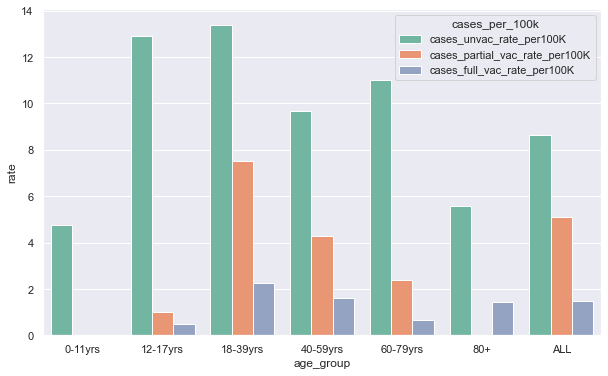

In [37]:
#ploting bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=rate_by_vax_stkdf,y='rate',x='age_group',hue='cases_per_100k')